# Training Image Classification Model with SGD

|Item|Description|
|---|---|
|DeepLearning Framework|PyTorch|
|Dataset|CIFAR-100|
|Model Architecture|Simple CNN|
|Optimizer|SGD|


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import random
import numpy as np
import torch
import pprint
import matplotlib.pyplot as plt
import optuna
import pandas as pd
from pathlib import Path

from data_loader.data_loader import DataLoader
from models.pytorch import simple_cnn

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Set Random Seed

In [3]:
seed=42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

## Device Settings

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Hyperparameters

In [5]:
#epochs = 200
epochs = 3
batch_size = 128
n_trials = 20

## Other parameters

In [6]:
input_size = (batch_size, 3, 32, 32)
num_classes = 100

dataset_dir = '/tmp/dataset'
model_name = 'cifar-100_model'
output_dir = './014-3_ImageClassification-CIFAR100-SimpleCNN-Momentum-PyTorch'

In [7]:
Path(dataset_dir).mkdir(exist_ok=True)
Path(output_dir).mkdir(exist_ok=True)

## Load Dataset and Normalize

In [8]:
dataloader = DataLoader(dataset_name='cifar100_pytorch', dataset_dir=dataset_dir)

100% 169001437/169001437 [00:11<00:00, 15193853.45it/s]


Extracting /tmp/dataset/cifar-100-python.tar.gz to /tmp/dataset
Files already downloaded and verified


## Training Model

In [10]:
def objective_lr(dataloader):
    def objective(trial):
        optim_params = {
            'optim': 'momentum',
            'lr': trial.suggest_float('learning_rate', 0.00001, 0.1, log=True),
            'momentum': trial.suggest_float('momentum', 0.3, 0.9)
        }
        
        model = simple_cnn.SimpleCNN(device, input_size=input_size, num_classes=num_classes)
        model_dir = Path(output_dir, f'{model_name}-{trial.number}')
        
        train_result = model.train(dataloader.dataset.trainloader, epochs=epochs, optim_params=optim_params, output_dir=model_dir)
        train_result = model.predict(dataloader.dataset.trainloader)
        train_predictions, train_labels = train_result
        train_eval_result = model.evaluate(train_labels, train_predictions)
        trial.set_user_attr("train_accuracy", train_eval_result['accuracy'])

        test_result = model.predict(dataloader.dataset.testloader)
        test_predictions, test_labels = test_result
        test_eval_result = model.evaluate(test_labels, test_predictions)
        trial.set_user_attr("test_accuracy", test_eval_result['accuracy'])
        
        return train_eval_result['accuracy']

    return objective

study = optuna.create_study(direction='maximize')
study.optimize(objective_lr(dataloader), n_trials=n_trials)

[I 2024-05-12 00:07:39,232] A new study created in memory with name: no-name-d8899983-71be-4bcc-b4ae-53bd7e517525


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [11]:
study.trials[0]

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.01106], datetime_start=datetime.datetime(2024, 5, 12, 0, 7, 39, 233210), datetime_complete=datetime.datetime(2024, 5, 12, 0, 8, 38, 629201), params={'learning_rate': 0.0032836320278505178, 'momentum': 0.30106677994740505}, user_attrs={'train_accuracy': 0.01106, 'test_accuracy': 0.0123}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'momentum': FloatDistribution(high=0.9, log=False, low=0.3, step=None)}, trial_id=0, value=None)

In [12]:
with open(Path(output_dir, 'study.pkl'), 'wb') as f:
    pickle.dump(study, f)

## Optimization History

In [13]:
with open(Path(output_dir, 'study.pkl'), 'rb') as f:
    study = pickle.load(f)

In [14]:
study.trials[0]

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.01106], datetime_start=datetime.datetime(2024, 5, 12, 0, 7, 39, 233210), datetime_complete=datetime.datetime(2024, 5, 12, 0, 8, 38, 629201), params={'learning_rate': 0.0032836320278505178, 'momentum': 0.30106677994740505}, user_attrs={'train_accuracy': 0.01106, 'test_accuracy': 0.0123}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'momentum': FloatDistribution(high=0.9, log=False, low=0.3, step=None)}, trial_id=0, value=None)

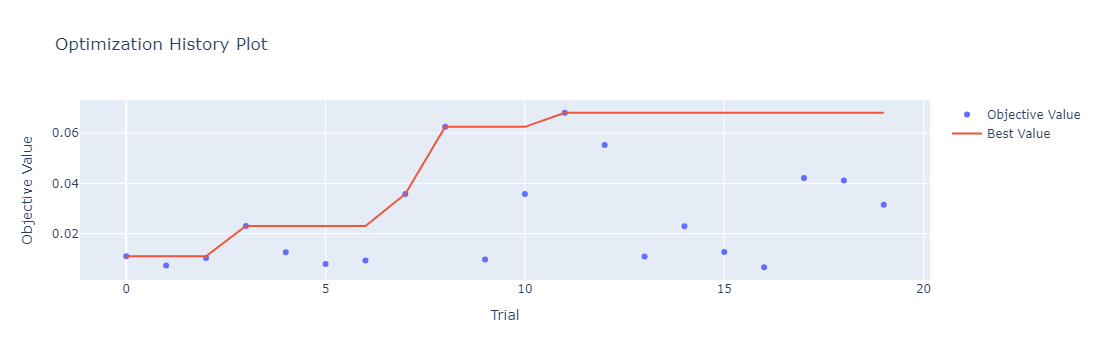

In [24]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

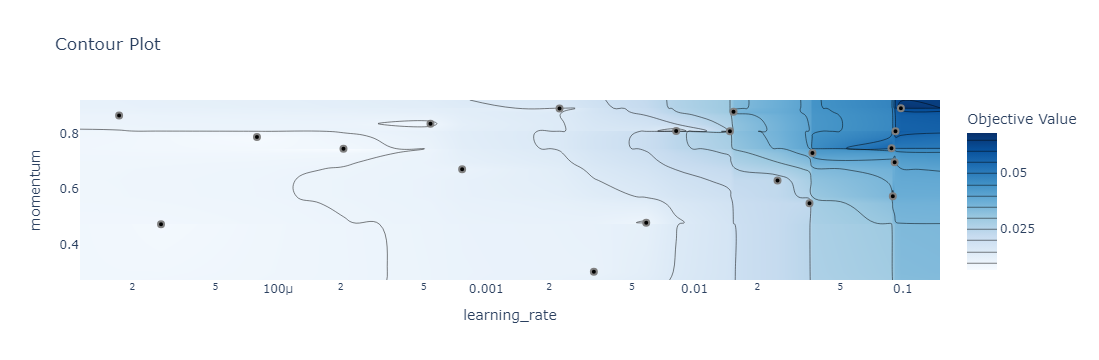

In [22]:
target_names = list(study.trials[0].params.keys())
fig = optuna.visualization.plot_contour(study, params=target_names)
fig.show()

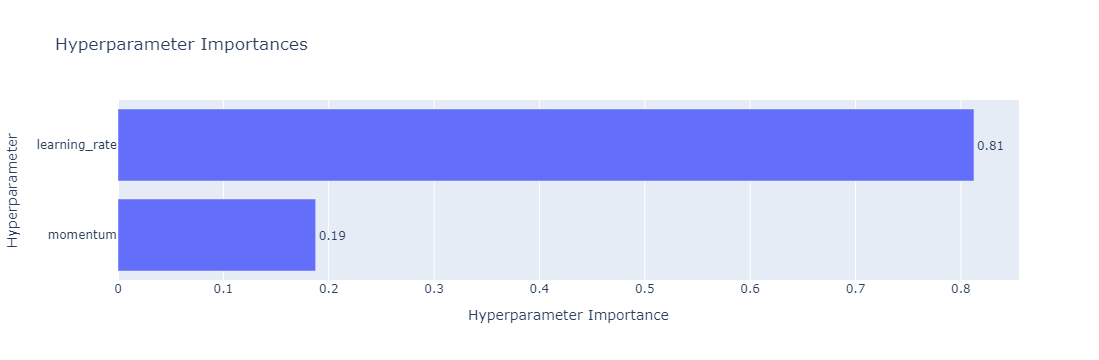

In [23]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

## Test Best Model

In [16]:
study.best_trial

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.0681], datetime_start=datetime.datetime(2024, 5, 12, 0, 17, 27, 761650), datetime_complete=datetime.datetime(2024, 5, 12, 0, 18, 14, 750776), params={'learning_rate': 0.09780502996212616, 'momentum': 0.8912577725515343}, user_attrs={'train_accuracy': 0.0681, 'test_accuracy': 0.0657}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'momentum': FloatDistribution(high=0.9, log=False, low=0.3, step=None)}, trial_id=11, value=None)

In [17]:
model_dir = Path(output_dir, f'{model_name}-{study.best_trial.number}')
pth_path = Path(model_dir, 'model.pth')
best_model = simple_cnn.SimpleCNN(device, input_size=input_size, num_classes=num_classes, pth_path=pth_path)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [128, 100]                --
├─Conv2d: 1-1                            [128, 64, 32, 32]         1,792
├─ReLU: 1-2                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [128, 64, 32, 32]         128
├─Conv2d: 1-4                            [128, 64, 32, 32]         36,928
├─ReLU: 1-5                              [128, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [128, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [128, 64, 16, 16]         --
├─Dropout: 1-8                           [128, 64, 16, 16]         --
├─Conv2d: 1-9                            [128, 128, 16, 16]        73,856
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [128, 128, 16, 16]        256
├─Conv2d: 1-12                           [128, 128, 16, 16]        147,

In [18]:
train_predictions, train_labels = best_model.predict(dataloader.dataset.trainloader)
train_eval_result = best_model.evaluate(train_labels, train_predictions)
pprint.pprint(train_eval_result)

{'accuracy': 0.0681,
 'classification_report': {'0': {'f1-score': 0.0,
                                 'precision': 0.0,
                                 'recall': 0.0,
                                 'support': 500},
                           '1': {'f1-score': 0.0,
                                 'precision': 0.0,
                                 'recall': 0.0,
                                 'support': 500},
                           '10': {'f1-score': 0.0,
                                  'precision': 0.0,
                                  'recall': 0.0,
                                  'support': 500},
                           '11': {'f1-score': 0.0,
                                  'precision': 0.0,
                                  'recall': 0.0,
                                  'support': 500},
                           '12': {'f1-score': 0.0,
                                  'precision': 0.0,
                                  'recall': 0.0,
                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [19]:
test_predictions, test_labels = best_model.predict(dataloader.dataset.testloader)
test_eval_result = best_model.evaluate(test_labels, test_predictions)
pprint.pprint(test_eval_result)

{'accuracy': 0.0657,
 'classification_report': {'0': {'f1-score': 0.0,
                                 'precision': 0.0,
                                 'recall': 0.0,
                                 'support': 100},
                           '1': {'f1-score': 0.0,
                                 'precision': 0.0,
                                 'recall': 0.0,
                                 'support': 100},
                           '10': {'f1-score': 0.0,
                                  'precision': 0.0,
                                  'recall': 0.0,
                                  'support': 100},
                           '11': {'f1-score': 0.0,
                                  'precision': 0.0,
                                  'recall': 0.0,
                                  'support': 100},
                           '12': {'f1-score': 0.0,
                                  'precision': 0.0,
                                  'recall': 0.0,
                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

